In [53]:
import os
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot
from ipywidgets import interact
from PIL import Image

In [ ]:
os.getcwd()

In [24]:
root = '/opt/ml/input'
dataset_path = "data"
file = pd.read_csv('../../submission/make_pseudo_anns(512)_SeMask-FAPN_trash_dataV1_WarmupPolyLR_1e-5-model_best_31199iter_fold-0.csv')

In [ ]:
for i in range(10):
    row = file.iloc[i]
    # print(row)


In [21]:
PALLETE = [[  0,   0,   0], [128,   0,   0], [  0, 128,   0], [128, 128,   0],
           [  0,   0, 128], [128,   0, 128], [  0, 128, 128], [128, 128, 128],
           [ 64,   0,   0], [192,   0,   0],[ 64, 128,   0]]

def show_img(i):
    row = file.iloc[i]
    img_id = row['image_id']
    
    pred = row['PredictionString']
    pred = np.array(pred.split(' '))
    pred = np.array(list(map(lambda x: PALLETE[int(x)], pred)))
    pred = pred.reshape((512,512,3))
    print(img_id)
    pyplot.imshow(pred)

interact(show_img, i=range(100))

interactive(children=(Dropdown(description='i', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

<function __main__.show_img(i)>

(262144,)
(262144, 3)
(512, 512, 3)
3
uint8


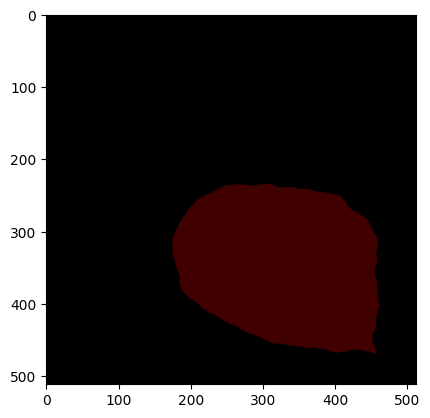

In [70]:
pred = file["PredictionString"][0]
anns = np.array(pred.split(" "))
print(anns.shape)
anns = np.array(list(map(lambda x: PALLETE[int(x)], anns)), dtype=np.uint8)
print(anns.shape)
anns = anns.reshape((512, 512, 3))
print(anns.shape)
print(anns.ndim)

image = Image.fromarray(anns.astype(np.uint8), mode="P")
image.save(os.path.join(f'pseudo_{0:04}.png'), 'png')
print(anns.dtype)
pyplot.imshow(anns)

In [67]:
for index, (image, pred) in enumerate(zip(file["image_id"], file["PredictionString"])):
    anns = np.array(pred.split(' '))
    anns = np.array(list(map(lambda x: PALLETE[int(x)], anns)), dtype=np.uint8)
    anns = anns.reshape((512, 512, 3))
    if index == 10:
        print(anns.dtype)
    if not os.path.exists(os.path.join(root, dataset_path, 'pseudo_annotations_2')):
        os.mkdir(os.path.join(root, dataset_path, 'pseudo_annotations_2'))
    image = Image.fromarray(anns.astype(np.uint8), mode="P")
    image.save(os.path.join(root, dataset_path, 'pseudo_annotations_2', f'pseudo_{index:04}.png'), 'png')


ValueError: Too many dimensions: 3 > 2.

In [66]:
import PIL
print(PIL.__version__)

9.1.0


In [29]:
for index, image in enumerate(file["image_id"]):
    temp_image = cv2.imread(os.path.join(root, dataset_path, image))
    if not os.path.exists(os.path.join(root, dataset_path, 'pseudo_images')):
        os.mkdir(os.path.join(root, dataset_path, 'pseudo_images'))
    temp_image = temp_image[:,:,::-1]
    cv2.imwrite(os.path.join(root, dataset_path, 'pseudo_images', f'pseudo_{index:04}.jpg'), temp_image)


In [41]:
import shutil
if not os.path.exists(os.path.join(root, dataset_path, 'pseudo_images')):
    os.mkdir(os.path.join(root, dataset_path, 'pseudo_images'))
        
for index, image in enumerate(file["image_id"]):
    img_origin_path = os.path.join(root, dataset_path, image)
    img_output_path = os.path.join(root, dataset_path, 'pseudo_images', f'pseudo_{index:04}.jpg')
    shutil.copy(img_origin_path, img_output_path)


In [48]:
import torch

img_np = cv2.imread(os.path.join(root, dataset_path, "pseudo_annotations", "pseudo_0000.png"))
img_tensor = torch.from_numpy(img_np)
img_tensor2 = torch.Tensor(img_np)
print(img_tensor.size())
print(img_tensor2.size())

torch.Size([512, 512, 3])
torch.Size([512, 512, 3])


In [51]:
image_origin = cv2.imread(os.path.join(root, dataset_path, "pseudo_images", "pseudo_0000.jpg"))
img_tensor = torch.from_numpy(img_np)
img_tensor2 = torch.Tensor(img_np)
print(img_tensor.size())
print(img_tensor2.size())

torch.Size([512, 512, 3])
torch.Size([512, 512, 3])


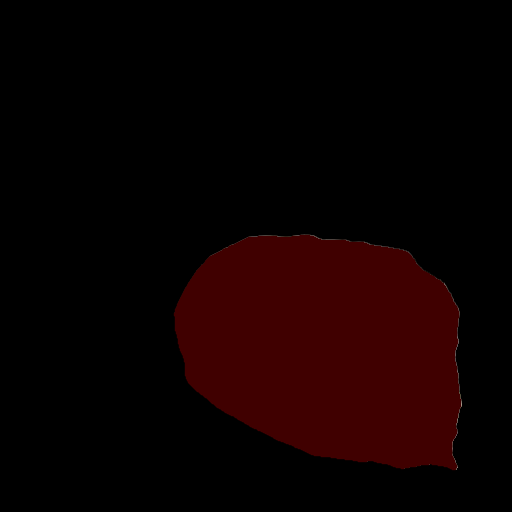

torch.Size([512, 512, 3])


In [62]:
image_rgb = Image.open(os.path.join(root, dataset_path, "pseudo_annotations_3", "pseudo_0000.png"))
image_rgb_array = np.array(image_rgb)

image_rgb.show()
image_to_tensor = torch.Tensor(image_rgb_array)
print(image_to_tensor.shape)